# Initial Exploratory Analysis

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn import svm
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
import struct
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
###Make sure to edit path if it is not the same.

dos = pd.read_csv('/content/drive/MyDrive/VIP/Fuzzy_dataset.csv')
#rpm = pd.read_csv('/content/drive/MyDrive/VIP/RPM_dataset.csv')
#gear = pd.read_csv('/content/drive/MyDrive/VIP/gear_dataset.csv')
#dos = pd.read_csv('/content/drive/MyDrive/VIP/DoS_dataset.csv')

In [40]:
# from google.colab import drive
# drive.mount('/content/drive')

Lets Add Column names

In [41]:
dos

,1478195721.903877,0545,8,d8,00,00.1,8a,00.2,00.3,00.4,00.5,R
0,1.478196e+09,02b0,5,ff,7f,00,05,49,R,NaN,NaN,NaN
1,1.478196e+09,0002,8,00,00,00,00,00,01,07,15,R
2,1.478196e+09,0153,8,00,21,10,ff,00,ff,00,00,R
3,1.478196e+09,0130,8,19,80,00,ff,fe,7f,07,60,R
4,1.478196e+09,0131,8,17,80,00,00,65,7f,07,9f,R
...,...,...,...,...,...,...,...,...,...,...,...,...
3838854,1.478201e+09,018f,8,fe,59,00,00,00,41,00,00,R
3838855,1.478201e+09,0260,8,18,21,21,30,08,8f,6d,19,R
3838856,1.478201e+09,02a0,8,24,00,9a,1d,97,02,bd,00,R
3838857,1.478201e+09,0329,8,dc,b7,7f,14,11,20,00,14,R


In [42]:
col_names = ['Timestamp', 'CAN_ID', 'DLC', 'Data0','Data1','Data2','Data3','Data4','Data5','Data6', 'Data7', 'Flag']

In [43]:
dos.columns = col_names
#fuzz.columns = col_names

In [44]:
dos
#print(fuzz.head())
#print(type(fuzz.loc[0, 'Data7']))

,Timestamp,CAN_ID,DLC,Data0,Data1,Data2,Data3,Data4,Data5,Data6,Data7,Flag
0,1.478196e+09,02b0,5,ff,7f,00,05,49,R,NaN,NaN,NaN
1,1.478196e+09,0002,8,00,00,00,00,00,01,07,15,R
2,1.478196e+09,0153,8,00,21,10,ff,00,ff,00,00,R
3,1.478196e+09,0130,8,19,80,00,ff,fe,7f,07,60,R
4,1.478196e+09,0131,8,17,80,00,00,65,7f,07,9f,R
...,...,...,...,...,...,...,...,...,...,...,...,...
3838854,1.478201e+09,018f,8,fe,59,00,00,00,41,00,00,R
3838855,1.478201e+09,0260,8,18,21,21,30,08,8f,6d,19,R
3838856,1.478201e+09,02a0,8,24,00,9a,1d,97,02,bd,00,R
3838857,1.478201e+09,0329,8,dc,b7,7f,14,11,20,00,14,R


In [45]:
dos['Timestamp']

0          1.478196e+09
1          1.478196e+09
2          1.478196e+09
3          1.478196e+09
4          1.478196e+09
               ...     
3838854    1.478201e+09
3838855    1.478201e+09
3838856    1.478201e+09
3838857    1.478201e+09
3838858    1.478201e+09
Name: Timestamp, Length: 3838859, dtype: float64

In [46]:
dos['Timestamp'][1] - dos['Timestamp'][0]

0.0027010440826416016

In [47]:
for i in range(1,20):
  print(dos['Timestamp'][i] - dos['Timestamp'][i-1])

0.0027010440826416016
0.00023889541625976562
0.0007381439208984375
0.0002460479736328125
0.0002448558807373047
0.00024008750915527344
0.00024390220642089844
0.00024700164794921875
0.00024199485778808594
0.00024199485778808594
0.0008351802825927734
0.0007038116455078125
0.00024199485778808594
0.00023412704467773438
0.00023484230041503906
0.00023698806762695312
0.0002372264862060547
0.0018877983093261719
0.002727985382080078


In [48]:
for i in range(1,20):
  print(dos['Timestamp'][i] - dos['Timestamp'][0])

0.0027010440826416016
0.002939939498901367
0.0036780834197998047
0.003924131393432617
0.004168987274169922
0.004409074783325195
0.004652976989746094
0.0048999786376953125
0.0051419734954833984
0.005383968353271484
0.006219148635864258
0.00692296028137207
0.007164955139160156
0.007399082183837891
0.00763392448425293
0.007870912551879883
0.008108139038085938
0.00999593734741211
0.012723922729492188


# Lets make plots by CAN_ID

In [49]:
#Plot of counts of IDs
#dos['CAN_ID'].value_counts().plot(kind='bar')
#fuzz['CAN_ID'].value_counts().plot(kind='bar')
#dos.loc[dos['DLC'] == 2]


We can see that '0000' is dominant. Lets see the difference between the attacks and regular messages



<Axes: title={'center': 'normal'}>

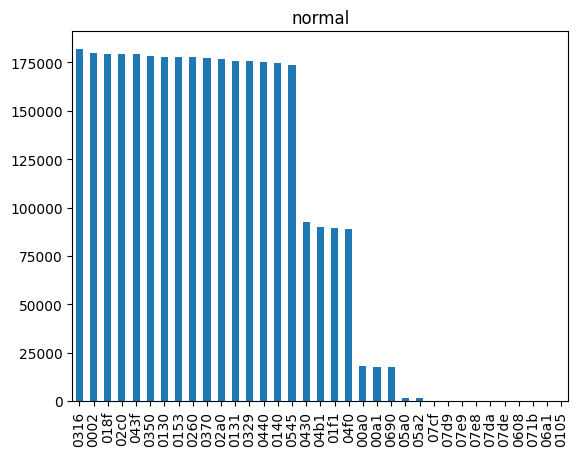

In [50]:
#Plots by flag
#dos['Flag'].value_counts()
normal = dos[dos['Flag'] == 'R']
attack = dos[dos['Flag'] == 'T']

normal['CAN_ID'].value_counts().plot(kind='bar', title = 'normal')

<Axes: title={'center': 'attack'}>

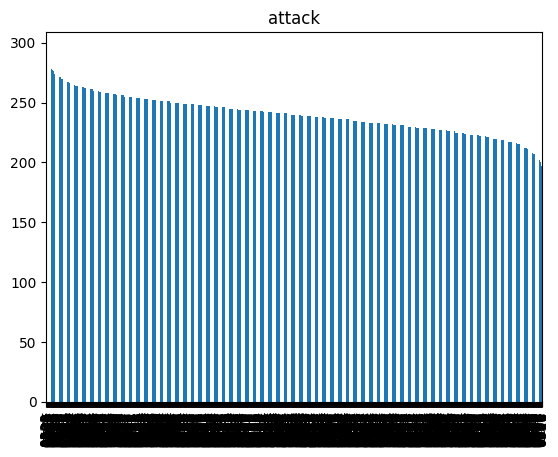

In [51]:
attack['CAN_ID'].value_counts().plot(kind='bar', title = 'attack')

#Lets try to make the timestamp better
* Go for better visualizations
* Timestamp is given in unix timestamp
* We can normalize it to milliseconds so its easier for us to understand



In [52]:
start = dos['Timestamp'][0]
end = dos['Timestamp'][1]
diff = (end-start)
diff
##WE HAVE ROUGHLY 48 minutes of data
#Look at distributions of attacks per minute
#

0.0027010440826416016

## A little visualization of how the DoS attack ID can be seen over time


<Axes: xlabel='Timestamp', ylabel='CAN_ID'>

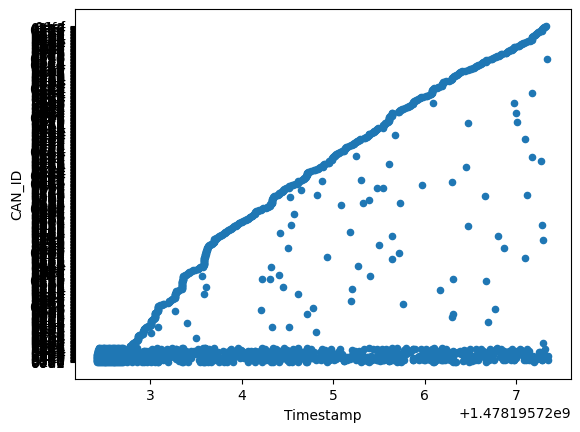

In [53]:
#attack2 = attack[:500]
#attack2.plot.scatter(x = 'Timestamp', y = 'CAN_ID')

dos2 = dos[1000:3000]
dos2.plot.scatter(x = 'Timestamp', y = 'CAN_ID')

#PREPROCESSING
###CONVERTING HEX to DECIMAL to be plugged ino SVM

###Useful resource https://docs.python.org/3/library/struct.html



In [54]:
#Make a function to turn hex to int

def hexToH(item):
  return struct.unpack('!h', bytes.fromhex(item))[0]

def hexToB(item):
  if type(item) == float:
    if math.isnan(item):
      return 0
  if item == "R":
    return 0
  else:
    return struct.unpack('!b', bytes.fromhex(item))[0]




In [55]:
#CAN ID is 2 bytes but data segment is 1 byte
#CANID use !h
#segment use !b
#FOR DLC == 2, R foro DATA 2 and NaN to
#dosProcessed = pd.DataFrame(dos)
dosProcessed = dos.copy()
dosProcessed = dosProcessed[dosProcessed['DLC'] == 8]
#print(dosProcessed)
dosProcessed['CAN_ID'] = dosProcessed['CAN_ID'].apply(hexToH)
dosProcessed['Data0'] = dosProcessed['Data0'].apply(hexToB)
dosProcessed['Data1'] = dosProcessed['Data1'].apply(hexToB)
dosProcessed['Data2'] = dosProcessed['Data2'].apply(hexToB)
dosProcessed['Data3'] = dosProcessed['Data3'].apply(hexToB)
dosProcessed['Data4'] = dosProcessed['Data4'].apply(hexToB)
dosProcessed['Data5'] = dosProcessed['Data5'].apply(hexToB)
dosProcessed['Data6'] = dosProcessed['Data6'].apply(hexToB)
dosProcessed['Data7'] = dosProcessed['Data7'].apply(hexToB)

#dosProcessed
#dosProcessed['Data0','Data1','Data2','Data3','Data4','Data5','Data6', 'Data7']
#first apply to CAN_ID Columns
#for i,item in enumerate(dosProcessed['CAN_ID']):
  #print(type(item))
  #dosProcessed.loc[i, 'CAN_ID'] = struct.unpack('!h', bytes.fromhex(item))[0]

#dosProcessed['CAN_ID'] = struct.unpack('!h', bytes.fromhex(dosProcessed['CAN_ID'])[0])
#dosProcessed = dosProcessed.apply(lambda x: struct.unpack('!h', bytes.fromhex(x)) if x.name == 'CAN_ID' else x, axis=1)
#Next apply to data segmnet parts

#for i,item in enumerate(dosProcessed):
  #print(item)
  #dosProcessed.loc[i, 'CAN_ID'] = struct.unpack('!h', bytes.fromhex(item))[0]

dosProcessed.head()



,Timestamp,CAN_ID,DLC,Data0,Data1,Data2,Data3,Data4,Data5,Data6,Data7,Flag
1,1.478196e+09,2,8,0,0,0,0,0,1,7,21,R
2,1.478196e+09,339,8,0,33,16,-1,0,-1,0,0,R
3,1.478196e+09,304,8,25,-128,0,-1,-2,127,7,96,R
4,1.478196e+09,305,8,23,-128,0,0,101,127,7,-97,R
5,1.478196e+09,320,8,0,0,0,0,2,32,39,-88,R


In [56]:
#dosProcessed.fillna(0)
print(dosProcessed.isnull().any())

Timestamp    False
CAN_ID       False
DLC          False
Data0        False
Data1        False
Data2        False
Data3        False
Data4        False
Data5        False
Data6        False
Data7        False
Flag         False
dtype: bool


##SPLIT NOW AND APPLY SVM


In [57]:
# MAY NEED TO USE ONE HOT?
#enc = preprocessing.OneHotEncoder()


In [58]:
y = dosProcessed['Flag']
X = dosProcessed.drop('Flag', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False )



#trainSize = math.ceil(len(dosProcessed) * .8)
#trainSet = dosProcessed[:trainSize]
#testSet = dosProcessed[trainSize:]


#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

#trainSet.head()
#testSet.head()

In [59]:
#X = trainSet[:][:11]
#X = trainSet.iloc[:, 0:11]
#Y = trainSet['Flag']
#X.head()
#Y

Linear SVC [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)

Only took 4 mins?
Accuracy score: 0.9995501549695495


In [60]:
#USE LInear SVC since we have large data points
clf = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5))
#clf = svm.linearSVC()
linearModel = clf.fit(X_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [61]:
y_predicted = linearModel.predict(X_test)


In [62]:
accuracy_score(y_test,y_predicted )

1.0

In [63]:
cm = confusion_matrix(y_test, y_predicted)
ConfusionMatrixDisplay(cm, "AnDY").plot()

TypeError: ignored